# PROBLEM SET 2 (DATA NOTEBOOK)

## MACS 31300: AI Applications in Social Sciences

### Mingtao Gao and Ishan Nagpal

In [1]:
import re
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### INSIDERS' FINANCIAL STAKE IN ENRON PRIOR TO BANKRUPTCY

In [2]:
# Identify POI and merge and clean dataset contaning Insiders' financial stake in Enron
def enron_finclean():
    df1 = pd.read_csv('enronfinance.csv') #Source: https://github.com/teomotun/Enron-Scandal-Machine-Learning/blob/master/dataset/enron_dataset.csv
    df2 = pd.read_csv('enron_crimpros.csv') #Source: http://usatoday30.usatoday.com/money/industries/energy/2005-12-28-enron-participants_x.htm.
    df2 = df2.set_index('insider')
    df1 = df1.set_index('insider')
    df1 = df1.fillna(0)
    df1 = df1.replace('-',0)
    df1 = df1.astype(float)
    df_f = df1.merge(df2,how='left',left_index=True, right_index=True)
    df_f['POI'] = df_f['POI'].fillna('No')
    df_f['bonus_salary_ratio'] = df_f['bonus']/df_f['salary']
    df_f['bonus_salary_ratio'] = df_f['bonus_salary_ratio'].fillna(0)
    df_f = df_f.reset_index().rename({'index':'insider'})
    return df_f

df = enron_finclean()
df.head() #Preview of Enron Insiders'Financial Stake. We have 18 features for 144 insiders.

,insider,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,stock_op_exercised,restrict_stock,restrict_stock_deferred,total_stock_value,position,POI,bonus_salary_ratio
0,"ALLEN, PHILLIP K",201955.0,4175000.0,304805.0,-3081055.0,2869717.0,0.0,152.0,13868.0,0.0,4484442.0,1729541.0,126027.0,-126027.0,1729541.0,NaN,No,20.672922
1,"BADUM, JAMES P",0.0,0.0,0.0,0.0,178980.0,0.0,0.0,3486.0,0.0,182466.0,257817.0,0.0,0.0,257817.0,NaN,No,0.000000
2,"BANNANTINE, JAMES M",477.0,0.0,0.0,-5104.0,0.0,0.0,864523.0,56301.0,0.0,916197.0,4046157.0,1757552.0,-560222.0,5243487.0,NaN,No,0.000000
3,"BAXTER, JOHN C",267102.0,1200000.0,1586055.0,-1386055.0,1295738.0,0.0,2660303.0,11200.0,0.0,5634343.0,6680544.0,3942714.0,0.0,10623258.0,NaN,No,4.492666
4,"BAY, FRANKLIN R",239671.0,400000.0,0.0,-201641.0,260455.0,0.0,69.0,129142.0,0.0,827696.0,0.0,145796.0,-82782.0,63014.0,NaN,No,1.668955


We utilize documents filed in Enron's bankruptcy case (In re: Enron, Case No. 01-16034) to generate a dataset of insiders' financial stake in the company before insolvency. We create a list of POIs, defined as individuals criminally prosecuted for the Enron scandal utilizing a USA Today article. Datasets are merged to produce a final product that contains insiders' financial information and whether they are a "POI." Further cleaning is required to replace "na" and "-" with 0. We also create a column that calculates the bonus/salary ratio. 

In [5]:
# Add a feature to dataset which contains insiders' email.
insider_emails = pd.read_csv('enroninsider_emails.csv')
df = pd.concat([df, insider_emails], axis=1).drop(columns=['name'])
df.head()

,insider,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,stock_op_exercised,restrict_stock,restrict_stock_deferred,total_stock_value,position,POI,bonus_salary_ratio,email_address
0,"ALLEN, PHILLIP K",201955.0,4175000.0,304805.0,-3081055.0,2869717.0,0.0,152.0,13868.0,0.0,4484442.0,1729541.0,126027.0,-126027.0,1729541.0,NaN,No,20.672922,phillip.allen@enron.com
1,"BADUM, JAMES P",0.0,0.0,0.0,0.0,178980.0,0.0,0.0,3486.0,0.0,182466.0,257817.0,0.0,0.0,257817.0,NaN,No,0.000000,NaN
2,"BANNANTINE, JAMES M",477.0,0.0,0.0,-5104.0,0.0,0.0,864523.0,56301.0,0.0,916197.0,4046157.0,1757552.0,-560222.0,5243487.0,NaN,No,0.000000,james.bannantine@enron.com
3,"BAXTER, JOHN C",267102.0,1200000.0,1586055.0,-1386055.0,1295738.0,0.0,2660303.0,11200.0,0.0,5634343.0,6680544.0,3942714.0,0.0,10623258.0,NaN,No,4.492666,NaN
4,"BAY, FRANKLIN R",239671.0,400000.0,0.0,-201641.0,260455.0,0.0,69.0,129142.0,0.0,827696.0,0.0,145796.0,-82782.0,63014.0,NaN,No,1.668955,frank.bay@enron.com


#### General Exploration of Insiders' Financial Data

In [6]:
print('We have email addresses for %s out of 144 insiders.' % df['email_address'].count())

We have email addresses for 111 out of 144 insiders.


We conduct exploratory analysis on the Insider Financial Data and draw attention to the following findings 1) Jeffery Skilling had the largest salary, making 1,111,258 a year. Insiders were paid, on average, 178,077.76 with a standard deviation of 183,442.69; 2) John Lavorato received the largest annual bonus - 8,000,000 a year. Insiders received, on average, a bonus of 662,108.47 and a standard deviation of 1,229,396.04; 3) when Enron declared bankruptcy, Kenneth Lay had the largest stake in the company, with a stock valuation of 49,110,078. The average insider had a stake in Enron valued at 2,915,884.21, with a standard deviation of 6,200,290.24.

#### CLEANING AND GENERATING ENRON'S EMAIL METADATA

In [8]:
# Load raw email dataset (Source: https://www.kaggle.com/wcukierski/enron-email-dataset)
emails_raw = pd.read_csv('emails.csv')
print(emails_raw.shape)
emails_raw.head()

(517401, 2)


,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [9]:
# Example of an email
print(emails_raw.loc[0]['message'])

Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 


In [10]:
# Process raw emails to separate senders' and receivers' email address
def parse_raw_message(raw_message):
    lines = raw_message.split('\n')
    email = {}
    message = ''
    keys_to_extract = ['from', 'to']
    for line in lines:
        if ':' not in line:
            message += line.strip()
            email['body'] = message
        else:
            pairs = line.split(':')
            key = pairs[0].lower()
            val = pairs[1].strip()
            if key in keys_to_extract:
                email[key] = val
    return email

def parse_into_emails(messages):
    emails = [parse_raw_message(message) for message in messages]
    return {
        'body': map_to_list(emails, 'body'), 
        'to': map_to_list(emails, 'to'), 
        'from_': map_to_list(emails, 'from')
    }

def map_to_list(emails, key):
    results = []
    for email in emails:
        if key not in email:
            results.append('')
        else:
            results.append(email[key])
    return results

In [11]:
email_df = pd.DataFrame(parse_into_emails(emails_raw.message))
email_df = email_df.dropna(how='any', subset=['to', 'from_'])
email_df.head()

,body,to,from_
0,Here is our forecast,tim.belden@enron.com,phillip.allen@enron.com
1,Traveling to have a business meeting takes the...,john.lavorato@enron.com,phillip.allen@enron.com
2,test successful. way to go!!!,leah.arsdall@enron.com,phillip.allen@enron.com
3,"Randy,Can you send me a schedule of the salary...",randall.gay@enron.com,phillip.allen@enron.com
4,,greg.piper@enron.com,phillip.allen@enron.com


In [12]:
# Insiders' emails and POIs' emails
insider_emails = df.email_address.replace('NaN', np.nan, regex=True).tolist()
poi_emails = df[df.POI == 'Yes'].email_address.tolist()

In [13]:
# Count the number of emails received and sent by POI
received_from_all = []
received_from_insider = []
received_from_poi = []
sent_to_all = []
sent_to_insider = []
sent_to_poi = []

for email in insider_emails:
    received_from_all.append(email_df[email_df.to == email].shape[0])
    received_from_insider.append(email_df[(email_df.from_.isin(insider_emails)) & \
                                          (email_df.to == email)].shape[0])
    received_from_poi.append(email_df[(email_df.from_.isin(poi_emails)) & \
                                  (email_df.to == email)].shape[0])
    sent_to_all.append(email_df[email_df.from_ == email].shape[0])
    sent_to_insider.append(email_df[(email_df.to.isin(insider_emails)) & \
                                  (email_df.from_ == email)].shape[0])
    sent_to_poi.append(email_df[(email_df.to.isin(poi_emails)) & \
                          (email_df.from_ == email)].shape[0])

# Add those features into the finantial dataset
df['from_all'] = received_from_all
df['to_all'] = sent_to_all
df['from_insider'] = received_from_insider
df['to_insider'] = sent_to_insider
df['from_poi'] = received_from_poi
df['to_poi'] = sent_to_poi

#### FINAL DATASET FOR ANALYSIS

In [14]:
# Final dataset for analysis
df

,insider,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,...,position,POI,bonus_salary_ratio,email_address,from_all,to_all,from_insider,to_insider,from_poi,to_poi
0,"ALLEN, PHILLIP K",201955.0,4175000.0,304805.0,-3081055.0,2869717.0,0.0,152.0,13868.0,0.0,...,NaN,No,20.672922,phillip.allen@enron.com,76,2099,13,83,0,24
1,"BADUM, JAMES P",0.0,0.0,0.0,0.0,178980.0,0.0,0.0,3486.0,0.0,...,NaN,No,0.000000,NaN,0,0,0,0,0,0
2,"BANNANTINE, JAMES M",477.0,0.0,0.0,-5104.0,0.0,0.0,864523.0,56301.0,0.0,...,NaN,No,0.000000,james.bannantine@enron.com,9,15,9,2,3,0
3,"BAXTER, JOHN C",267102.0,1200000.0,1586055.0,-1386055.0,1295738.0,0.0,2660303.0,11200.0,0.0,...,NaN,No,4.492666,NaN,0,0,0,0,0,0
4,"BAY, FRANKLIN R",239671.0,400000.0,0.0,-201641.0,260455.0,0.0,69.0,129142.0,0.0,...,NaN,No,1.668955,frank.bay@enron.com,4,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,"WINOKUR JR., HERBERT S",0.0,0.0,0.0,-25000.0,0.0,0.0,0.0,1413.0,108579.0,...,NaN,No,0.000000,NaN,0,0,0,0,0,0
140,"WODRASKA, JOHN",0.0,0.0,0.0,0.0,0.0,0.0,189583.0,0.0,0.0,...,NaN,No,0.000000,john.wodraska@enron.com,0,0,0,0,0,0
141,"WROBEL, BRUCE",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,No,0.000000,NaN,0,0,0,0,0,0
142,"YEAGER, F SCOTT",158403.0,0.0,0.0,0.0,0.0,0.0,147950.0,53947.0,0.0,...,Broadband strategist,Yes,0.000000,scott.yeager@enron.com,3,0,0,0,0,0


In [16]:
pd.options.display.float_format = "{:.2f}".format
df.describe(include=[np.number]) 

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,...,restrict_stock,restrict_stock_deferred,total_stock_value,bonus_salary_ratio,from_all,to_all,from_insider,to_insider,from_poi,to_poi
count,144.00,144.00,144.00,144.00,144.00,144.00,144.00,144.00,144.00,144.00,...,144.00,144.00,144.00,144.00,144.00,144.00,144.00,144.00,144.00,144.00
mean,178077.76,662108.47,325728.59,-171013.06,178169.49,568923.61,242207.44,35700.15,9711.92,2029666.38,...,875928.00,-52616.58,2915884.21,2.14,108.15,294.69,22.35,22.35,2.26,5.47
std,183442.69,1229396.04,679285.36,544399.18,545383.44,6793598.67,960401.51,45927.04,30422.53,8689072.06,...,1982650.05,273183.47,6200290.24,3.72,292.95,1253.40,42.56,67.46,6.03,21.21
min,0.00,0.00,0.00,-3504386.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,-2604490.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,-37086.00,0.00,0.00,0.00,0.00,0.00,86805.50,...,41184.75,0.00,244326.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,208310.50,275000.00,0.00,0.00,0.00,0.00,826.00,20182.00,0.00,906019.00,...,360528.00,0.00,965955.00,1.18,9.50,13.00,4.00,2.00,0.00,0.00
75%,267595.50,800000.00,370877.50,0.00,1990.25,0.00,120329.00,53328.25,0.00,1853359.75,...,737456.00,0.00,2295175.75,2.82,43.75,38.50,23.00,9.25,0.00,2.00
max,1111258.00,8000000.00,5145434.00,0.00,3131860.00,81525000.00,10359729.00,228763.00,125034.00,103559793.00,...,14761694.00,0.00,49110078.00,24.53,1650.00,12526.00,229.00,414.00,35.00,182.00


In [12]:
# Save into a csv file
path = os.getcwd() + '/enron.csv'
df.to_csv (path, index = False, header=True)

#### EXPLORE INSIDER FINANCES FURTHER (EG., AVERAGE SALARY, BOUS, EXPENSES, ETC.)

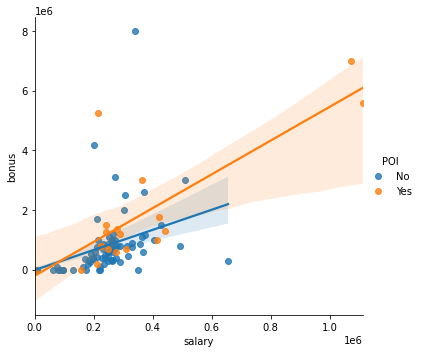

In [75]:
sns.lmplot('salary', 'bonus', data=df, hue='POI')
plt.show()

#### EXPLORE EMAIL METADATA FEATURES

In [42]:
df = pd.read_csv('enron.csv')

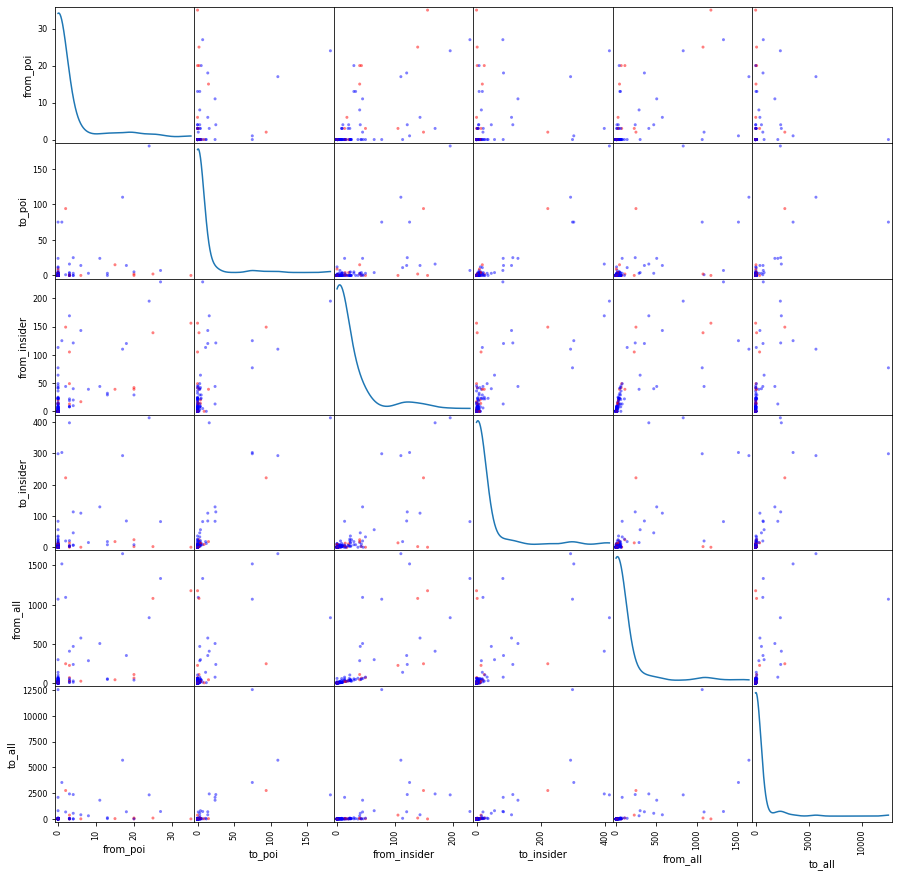

In [74]:
# We can take a look at the scatter matrix for all six features
pd.plotting.scatter_matrix(df[['from_poi','to_poi', 'from_insider','to_insider', 'from_all', 'to_all']],
                           diagonal='kde',
                           figsize=(15, 15),
                           color=df.POI.map({'Yes':'r', 'No':'b'}));

We decided to add new features to analyze from the email metadata. First two features are the ratio of emails that person received from POIs to all emails he received, and the ratio of emails that person sent to POIs to all emails he sent. The next two features are the ratio of emails that person received from POIs to all emails he received from other insiders, and the ratio of emails that person sent to POIs to all emails he sent to other insiders. 

In [43]:
# Add the new email features to the dataframe
df['from_poi_ratio'] = df['from_poi'] / df['from_all']
df['to_poi_ratio'] = df['to_poi'] / df['to_all']
df['from_poi_ratio_2'] = df['from_poi'] / df['from_insider']
df['to_poi_ratio_2'] = df['to_poi'] / df['to_insider']

Instead using the number of emails from or to a POI, the ratio of those emails to all emails from or to the insider can be more helpful in this case. We assume that insiders who interact more with a POI are more likely to be a POI themselves because the commitment of frauds usually cannot be done by one person. Therefore, we take a look at the scatter plots of those features. If our assumption is true, POIs should tend to have points higher in either one ratio or both ratios, and therefore they should be located either top or right, or upper right area. 

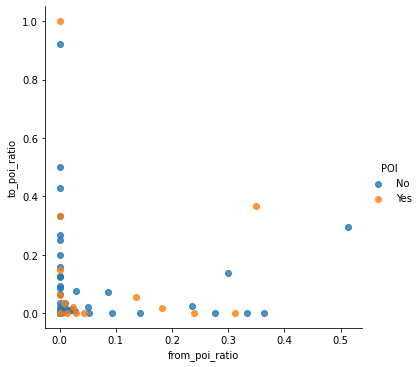

In [55]:
sns.lmplot('from_poi_ratio', 'to_poi_ratio', data=df, hue='POI', fit_reg=False)
plt.show()

If we look at ratios to all emails from and to each insider, there is not a clear pattern that POIs receives or sent more emails to POIs than other insiders (although one POI seems to have only sent emails to other POIs). This might be caused by the large amount emails from and to innocent people in the email dataset, which diminish the ratios of emails from and to POIs. There are total thousands of unique email addresses in Enron email dataset and there are many innocent persons who may have sent or received many emails from POI simply because of their daily work.

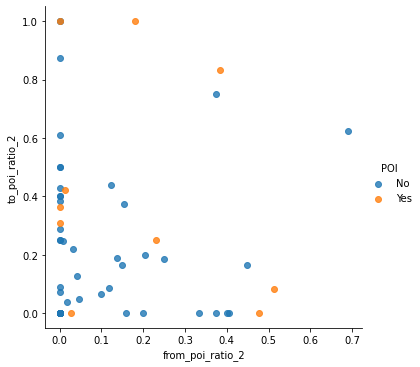

In [58]:
sns.lmplot('from_poi_ratio_2', 'to_poi_ratio_2', data=df, hue='POI', fit_reg=False)
plt.show()

The scatter plot of the second two features follows the pattern we expected. POIs are tend to be either at the top or the right side of the graph, and non-POIs are clustered to the bottom left. Thus, the second two new features will be useful in identifiying if an insider is POI or not, because of the noticeable differences between POIs and non-POIs in this plot.